# Data Wrangling

## Libraries

### Install

In [1]:
#!pip install missingno

### Imports

In [2]:
#Import the relevant modules
import os
import glob

import pandas as pd
import numpy as np

import datetime as dt
import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from pathlib import Path

import missingno as msno


## Read Data

In [3]:
# Change directory one step back and save as the root directory
ROOT_DIR = os.path.normpath(os.getcwd() + os.sep + os.pardir)

#Define start and end dates
fromDate = '2000-01-01'
toDate = '2023-04-15'

In [4]:
def get_file_name(file_name):
    name_ext = file_name.split("\\")[-1]
    name = name_ext.split(".")[0]
    return name

In [5]:
#Provide the name of CSV datasets
my_datasets_csv = [
    'eia_data.csv',
    'fred_data.csv',
    'offline_data.csv']

In [6]:
# Change directory one step back and save as the root directory
ROOT_DIR = os.path.normpath(os.getcwd() + os.sep + os.pardir)

# Change direcotry to the 'data\interim' folder
path = ROOT_DIR + '\\data\\interim\\'

#Get the full file names (including directory)
for i in range(len(my_datasets_csv)):
    my_datasets_csv[i] = path + my_datasets_csv[i]

In [7]:
# Initialize list; this is the final list that will store all the data from the json pull. 
data = []

# loop over the list of csv files
for f in my_datasets_csv:
    #print file name
    print(get_file_name(f))
    
    #read the csv file into a new dataframe
    new_data = pd.read_csv(f)
    
    #drop the header
    new_data = new_data.drop(columns = ['Unnamed: 0'])
    
    #filter using from-to-dates
    new_data = new_data.loc[(new_data['Date'] >= fromDate) & (new_data['Date'] <= toDate)]
    
    #print the dataframe shape
    print(new_data.shape)

    data.append(new_data)

eia_data
(280, 20)
fred_data
(280, 8)
offline_data
(280, 7)


## Merge dataframes

In [8]:
#find the df with longest dataseries
max_val = data[0].shape[0]
max_idx = 0

for i in range(len(data)):    
    size = size = data[i].shape[0]
    if size>max_val:
        max_val = size
        max_idx = i

In [9]:
#initiate the df with the the longest timeseries
df = data[max_idx]
for i in range(0, len(data)):
    if i != max_idx:
        df_temp = data[i]
        df = pd.merge_ordered(df, df_temp, on = 'Date')

df.set_index('Date', drop=True, inplace=True)

In [10]:
#sort data
df.sort_index(axis = 0, inplace = True)

#### Set Date format for index


In [11]:
#import datetime

df.index = pd.to_datetime(df.index)

## Explore features

### Check data types and counts

In [12]:
df.shape

(280, 32)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 280 entries, 2000-01-01 to 2023-04-01
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   wti                        280 non-null    float64
 1   oil_opec                   280 non-null    float64
 2   oil_nonopec                280 non-null    float64
 3   oil_world                  280 non-null    float64
 4   henry_hub_ng               280 non-null    float64
 5   oil_us                     280 non-null    float64
 6   petrol_oecd                280 non-null    float64
 7   petrol_nonoecd             280 non-null    float64
 8   us_cpi                     280 non-null    float64
 9   us_ppi                     280 non-null    float64
 10  us_ppi_petrol              244 non-null    float64
 11  us_pmi                     280 non-null    float64
 12  petroleum_inv_oecd         280 non-null    float64
 13  crude_inv_total            280 

### Display head and tail of data

In [14]:
#head of data records
display(df.head(5).round(1).T)

Date,2000-01-01,2000-02-01,2000-03-01,2000-04-01,2000-05-01
wti,27.3,29.4,29.8,25.7,28.8
oil_opec,26.0,26.7,26.6,27.5,28.0
oil_nonopec,46.9,46.8,46.9,46.6,46.6
oil_world,5.8,5.9,5.9,5.9,5.8
henry_hub_ng,47.2,50.2,49.4,46.3,47.3
oil_us,28.3,28.8,28.5,28.1,28.2
petrol_oecd,1.7,1.7,1.7,1.7,1.7
petrol_nonoecd,1.3,1.3,1.3,1.3,1.3
us_cpi,0.8,0.8,0.9,0.8,0.9
us_ppi,92.0,92.3,92.9,93.5,93.6


In [15]:
#tail of data records
display(df.tail(5).round(1).T)

Date,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01
wti,76.4,78.1,76.8,73.3,79.4
oil_opec,28.8,28.3,28.5,28.6,28.7
oil_nonopec,66.1,66.8,67.2,67.4,67.4
oil_world,12.1,12.6,12.5,12.8,12.6
henry_hub_ng,46.1,43.9,46.1,45.9,44.7
oil_us,54.6,53.9,55.3,54.9,54.6
petrol_oecd,3.0,3.0,3.0,3.0,3.0
petrol_nonoecd,2.6,2.6,2.6,2.6,2.5
us_cpi,2.9,3.1,3.1,3.0,3.1
us_ppi,98.3,99.9,100.3,99.5,100.5


## Missing data

In [16]:
def count_missing(df):
    ''' Count the number of missing values .isnull() in each column well as the percentages 
    Call pd.concat() to form a single table df with 'count' and '%' columns'''
    
    missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
    missing.columns=['count', '%']
    missing = missing.loc[missing['count'] > 0]
    missing.sort_values(by='count', ascending = False)
    
    return missing

### Missing data statistics

In [17]:
#Count missing data
missing_stats = count_missing(df)
display(missing_stats)

,count,%
us_ppi_petrol,36,12.857143
eu19_ppi,5,1.785714
real_dollar_index,72,25.714286
copper_futures,42,15.000000
gold_futures,44,15.714286
usd_index,47,16.785714


### Missing data plot

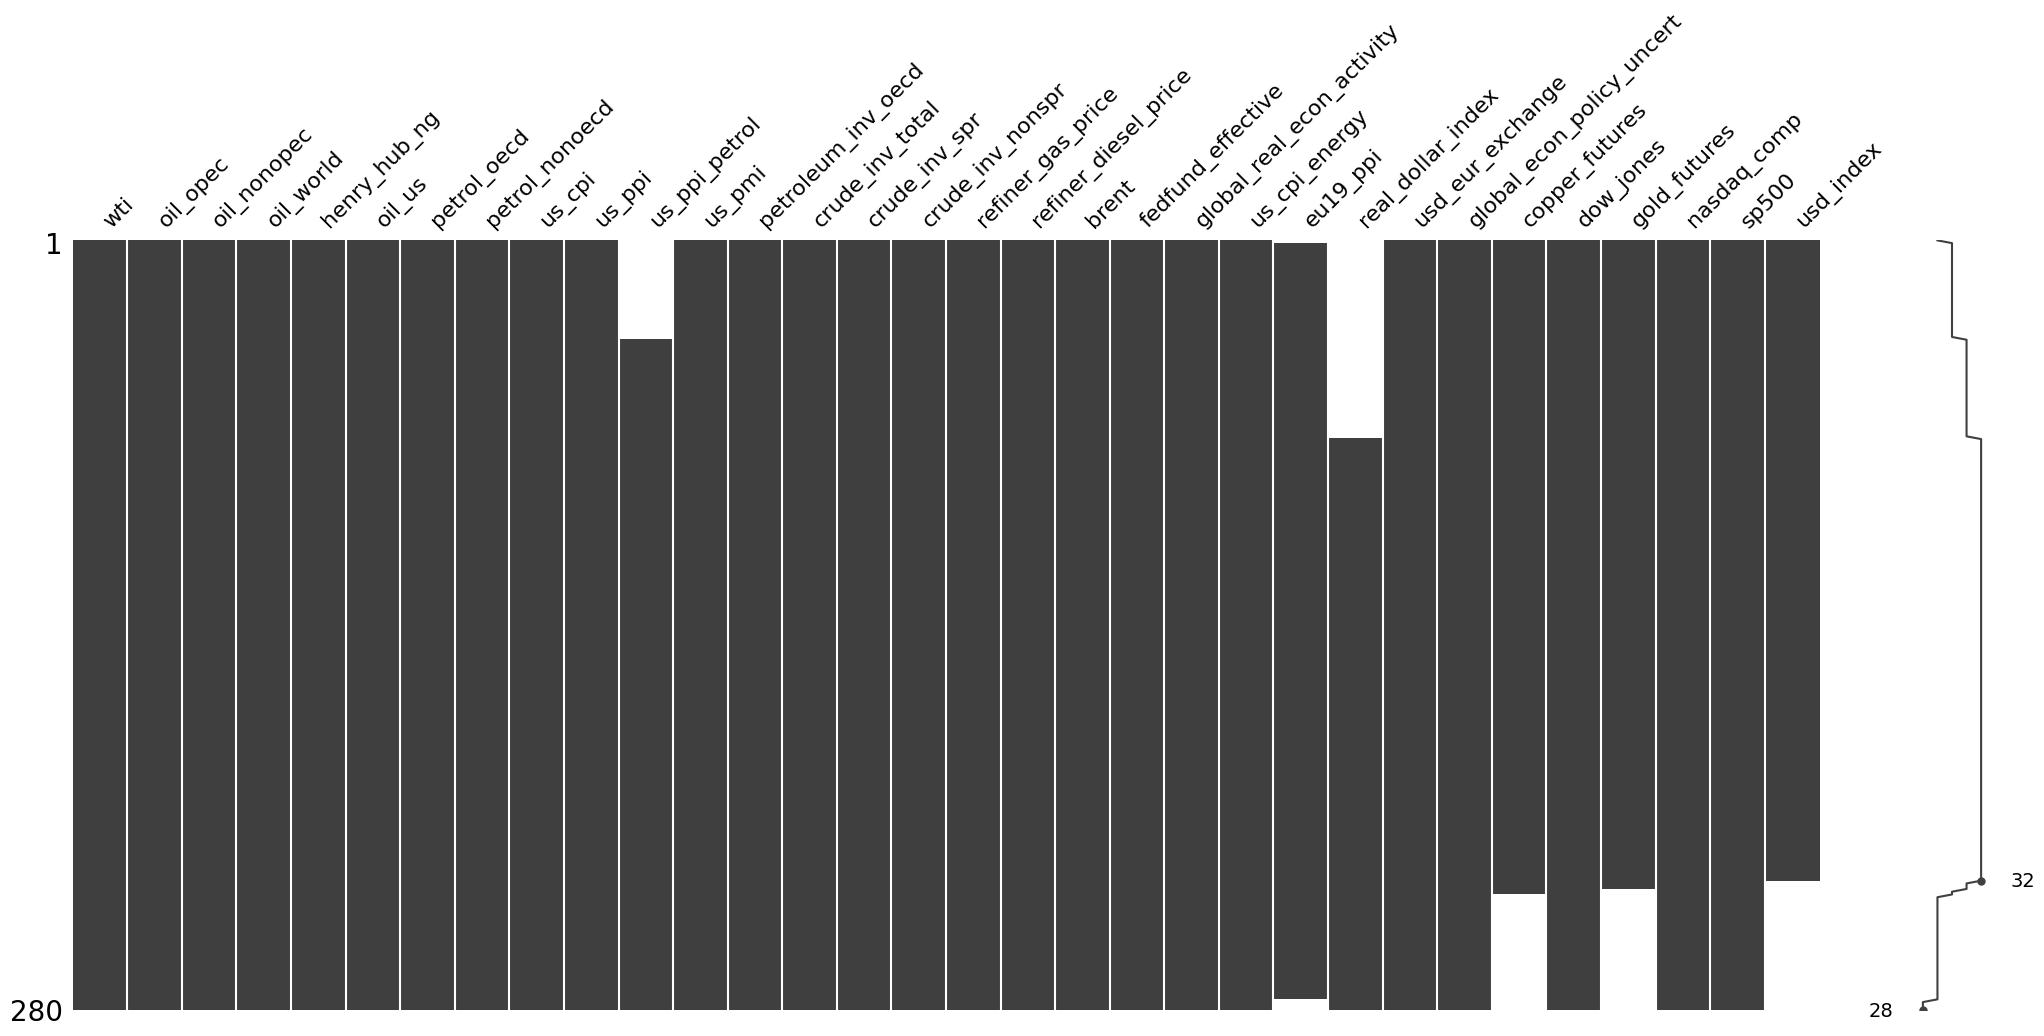

In [18]:
#Visualize the missing datausing "missingno" library
msno.matrix(df)
plt.show()

## Treat missing data

### 1. Set tolerances

In [19]:
### Tolerance for missing data %

print("""
Drop Columns:\t missing data (%) > tolerance_drop 
Drop Rows:\t tolerance_impute < missing data (%) < tolerance_drop
Impute Data:\t missing data (%) < tolerance_impute
""")

tolerance_drop = 1.5
tolerance_impute = 1.0

print('tolerance_drop =', tolerance_drop)
print('tolerance_impute =', tolerance_impute)


Drop Columns:	 missing data (%) > tolerance_drop 
Drop Rows:	 tolerance_impute < missing data (%) < tolerance_drop
Impute Data:	 missing data (%) < tolerance_impute

tolerance_drop = 1.5
tolerance_impute = 1.0


### 2. Drop Columns

#### Columns with NaN to drop

It is recommended to drop the  other data sources for the following featuers with more than the missing tolerance %

In [20]:
print('Columns with NaN to drop:')
drop_criteria = missing_stats['%'] >= tolerance_drop 
columns_to_drop = missing_stats.loc[drop_criteria]
display(columns_to_drop.round(2))

Columns with NaN to drop:


,count,%
us_ppi_petrol,36,12.86
eu19_ppi,5,1.79
real_dollar_index,72,25.71
copper_futures,42,15.00
gold_futures,44,15.71
usd_index,47,16.79


#### Drop column and store

In [21]:
#drop select columns
dropped_col = df.drop(columns = columns_to_drop.index, inplace = False)

print('Original data:',df.shape)
print('Missing droppped:', dropped_col.shape)

Original data: (280, 32)
Missing droppped: (280, 26)


### 3. Impute missing data

In [22]:
print('Columns with NaN to impute:')
impute_criteria = missing_stats['%'] < tolerance_impute
columns_to_impute = missing_stats.loc[impute_criteria]
display(columns_to_impute.round(2))

Columns with NaN to impute:


,count,%


#### Plot where data is missiing

In [23]:
def plot_timeseries(df, target_feature):
    
    #Plot the target feature
    fig, ax = plt.subplots(figsize = (8,2))
    
    #line plot for target feature
    sns.lineplot(data = df, x = df.index, y = target_feature)

    #scatter plot for missing values
    df_nan = df.loc[df[target_feature].isnull()]
    #use medain value for y
    y_val = df[target_feature].median()    
    sns.scatterplot(data = df_nan, x =df_nan.index, y = y_val, marker="o", color="r")

    # assign locator and formatter for the xaxis ticks.
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    # put the labels at 45deg since they tend to be too long
    fig.autofmt_xdate()
    
    plt.show()

In [24]:
#plot the data and the missing data locatin 'TO BE IMPUTED'
[plot_timeseries(dropped_col, item) for item in columns_to_impute.index]

[]

In [25]:
#Impute using bfill & ffil
for item in columns_to_impute.index:
    # Ffill imputation
    dropped_col[item] = dropped_col[item].fillna(method='ffill')
    # Bfill imputation
    dropped_col[item] = dropped_col[item].fillna(method='bfill')

In [26]:
print('Missing imputed:', dropped_col.shape)

Missing imputed: (280, 26)


### Drop Rows

In [27]:
#Count missing data
missing_stats = count_missing(dropped_col)

In [28]:
print('Columns with NaN to drop row:')
display(missing_stats.round(2))

Columns with NaN to drop row:


,count,%


In [29]:
dropped_row = dropped_col.dropna(axis = 0, inplace = False)

In [30]:
print('Missing droppped:', dropped_row.shape)

Missing droppped: (280, 26)


### Use df with no NaNs

In [31]:
df = dropped_row

## Explore data

### Check final DataFrame

In [32]:
#Display df head and tail
display(df.tail(7).T)

Date,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01
wti,87.550000,84.370000,76.440000,78.120000,76.830000,73.280000,79.450000
oil_opec,29.195000,28.730000,28.820000,28.265000,28.480000,28.635000,28.690000
oil_nonopec,66.860773,67.338145,66.104376,66.849130,67.233166,67.402368,67.440529
oil_world,12.377551,12.376018,12.138051,12.568448,12.532403,12.770144,12.649998
henry_hub_ng,44.987135,45.946261,46.105464,43.905498,46.136280,45.874367,44.672695
oil_us,53.055157,53.874302,54.641725,53.855434,55.318141,54.903430,54.579204
petrol_oecd,2.979870,2.985980,2.989900,3.005360,3.016480,3.018080,3.029180
petrol_nonoecd,2.647965,2.628884,2.612869,2.606221,2.591613,2.575346,2.542805
us_cpi,3.811730,3.619720,2.888640,3.108210,3.118160,3.046120,3.058310
us_ppi,101.233900,100.474300,98.313000,99.924000,100.271300,99.511000,100.507900


### Traget feature

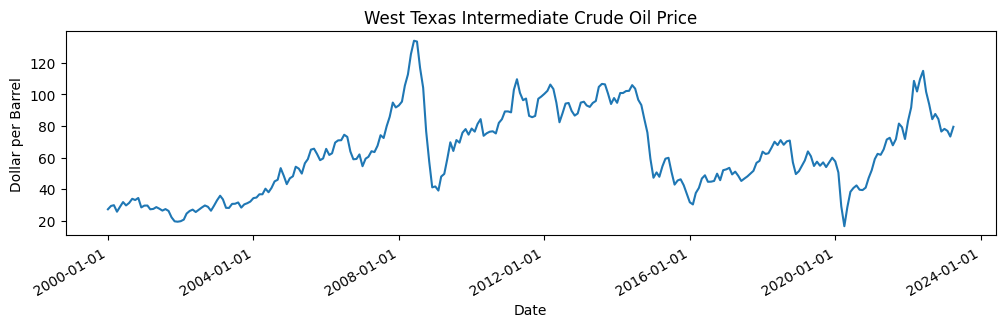

In [33]:
#Plot the target feature
fig, ax = plt.subplots(figsize = (12,3))
sns.lineplot(data = df, x = df.index, y = 'wti').set(ylabel = 'Dollar per Barrel', title = 'West Texas Intermediate Crude Oil Price')

# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()

plt.show()

### Summary Statistics

In [34]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
wti,280.0,62.69,25.92,16.55,41.56,59.35,83.48,133.88
oil_opec,280.0,29.01,1.94,22.35,28.21,29.27,30.32,32.39
oil_nonopec,280.0,56.02,6.18,46.62,50.93,54.59,61.13,67.45
oil_world,280.0,7.62,2.61,3.97,5.49,5.90,9.53,13.00
henry_hub_ng,280.0,47.41,2.32,34.99,46.10,47.37,48.86,52.88
oil_us,280.0,42.43,8.52,28.13,34.33,43.19,50.51,55.32
petrol_oecd,280.0,2.24,0.33,1.69,1.99,2.26,2.44,3.03
petrol_nonoecd,280.0,1.83,0.33,1.29,1.64,1.88,2.02,2.74
us_cpi,280.0,1.99,0.82,0.59,1.38,1.94,2.60,4.67
us_ppi,280.0,97.07,4.84,79.94,93.53,98.85,100.27,106.42


### Histograms

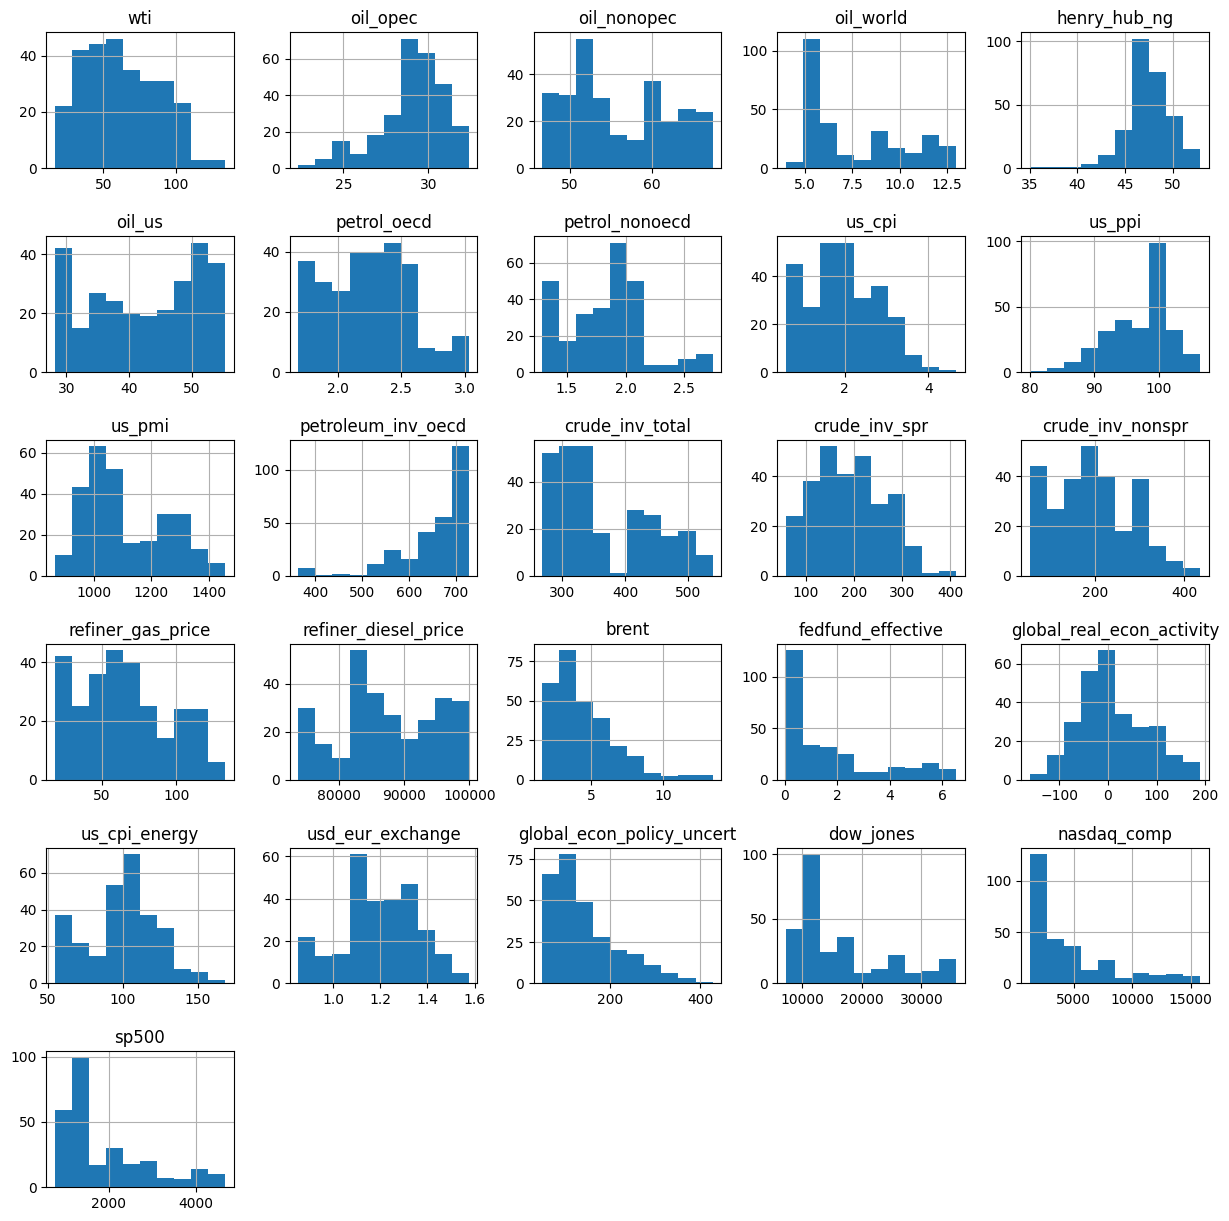

In [35]:
#Plot histogram of all  features
#Call plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
#It's important you create legible and easy-to-read plots
df.hist(figsize=(15,15))
plt.subplots_adjust(hspace=0.5);


## Store data

In [36]:
# Change direcotry to the 'data\raw' folder
path = ROOT_DIR + '\\data\\interim\\'

# Set a file name
file_save = path + 'step2_data_wrangling.csv'
df.to_csv(file_save)

print('Save:\n', file_save)

Save:
 D:\gitProjects\WTI_Crude_Oil_Price_Prediction_Using_ML\data\interim\step2_data_wrangling.csv
